<img src="MBA.JPG" alt="PH Meter" width="500"/>
Data Set Information:

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.
<img src="onlineRetial.JPG" alt="PH Meter" width="400"/>


Attribute Information:

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. 

Description: Product (item) name. Nominal. 

Quantity: The quantities of each product (item) per transaction. Numeric.	

InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated. 

UnitPrice: Unit price. Numeric, Product price per unit in sterling. 

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. 

Country: Country name. Nominal, the name of the country where each customer resides.



In [1]:
# Conda install mlxtend
# conda install -c conda-forge mlxtend
#print multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ="all"

In [2]:
import pandas as pd
import pandas_profiling
from mlxtend.frequent_patterns import apriori
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from mlxtend.frequent_patterns import association_rules

In [3]:
df = pd.read_excel('Online Retail.xlsx')
df.head()
df.describe()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
pandas_profiling.ProfileReport(df)

Number of variables,8
Number of observations,541909
Total Missing (%),3.1%
Total size in memory,33.1 MiB
Average record size in memory,64.0 B
Numeric,3
Categorical,4
Boolean,0
Date,1
Text (Unique),0
Rejected,0


In [5]:
df.shape

(541909, 8)

In [6]:
df.Country.nunique()
df.Country.unique()

38

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

## Top Sales by Country

In [7]:
df_country = df.Country.value_counts().reset_index()
df_country.head()

,index,Country
0,United Kingdom,495478
1,Germany,9495
2,France,8557
3,EIRE,8196
4,Spain,2533


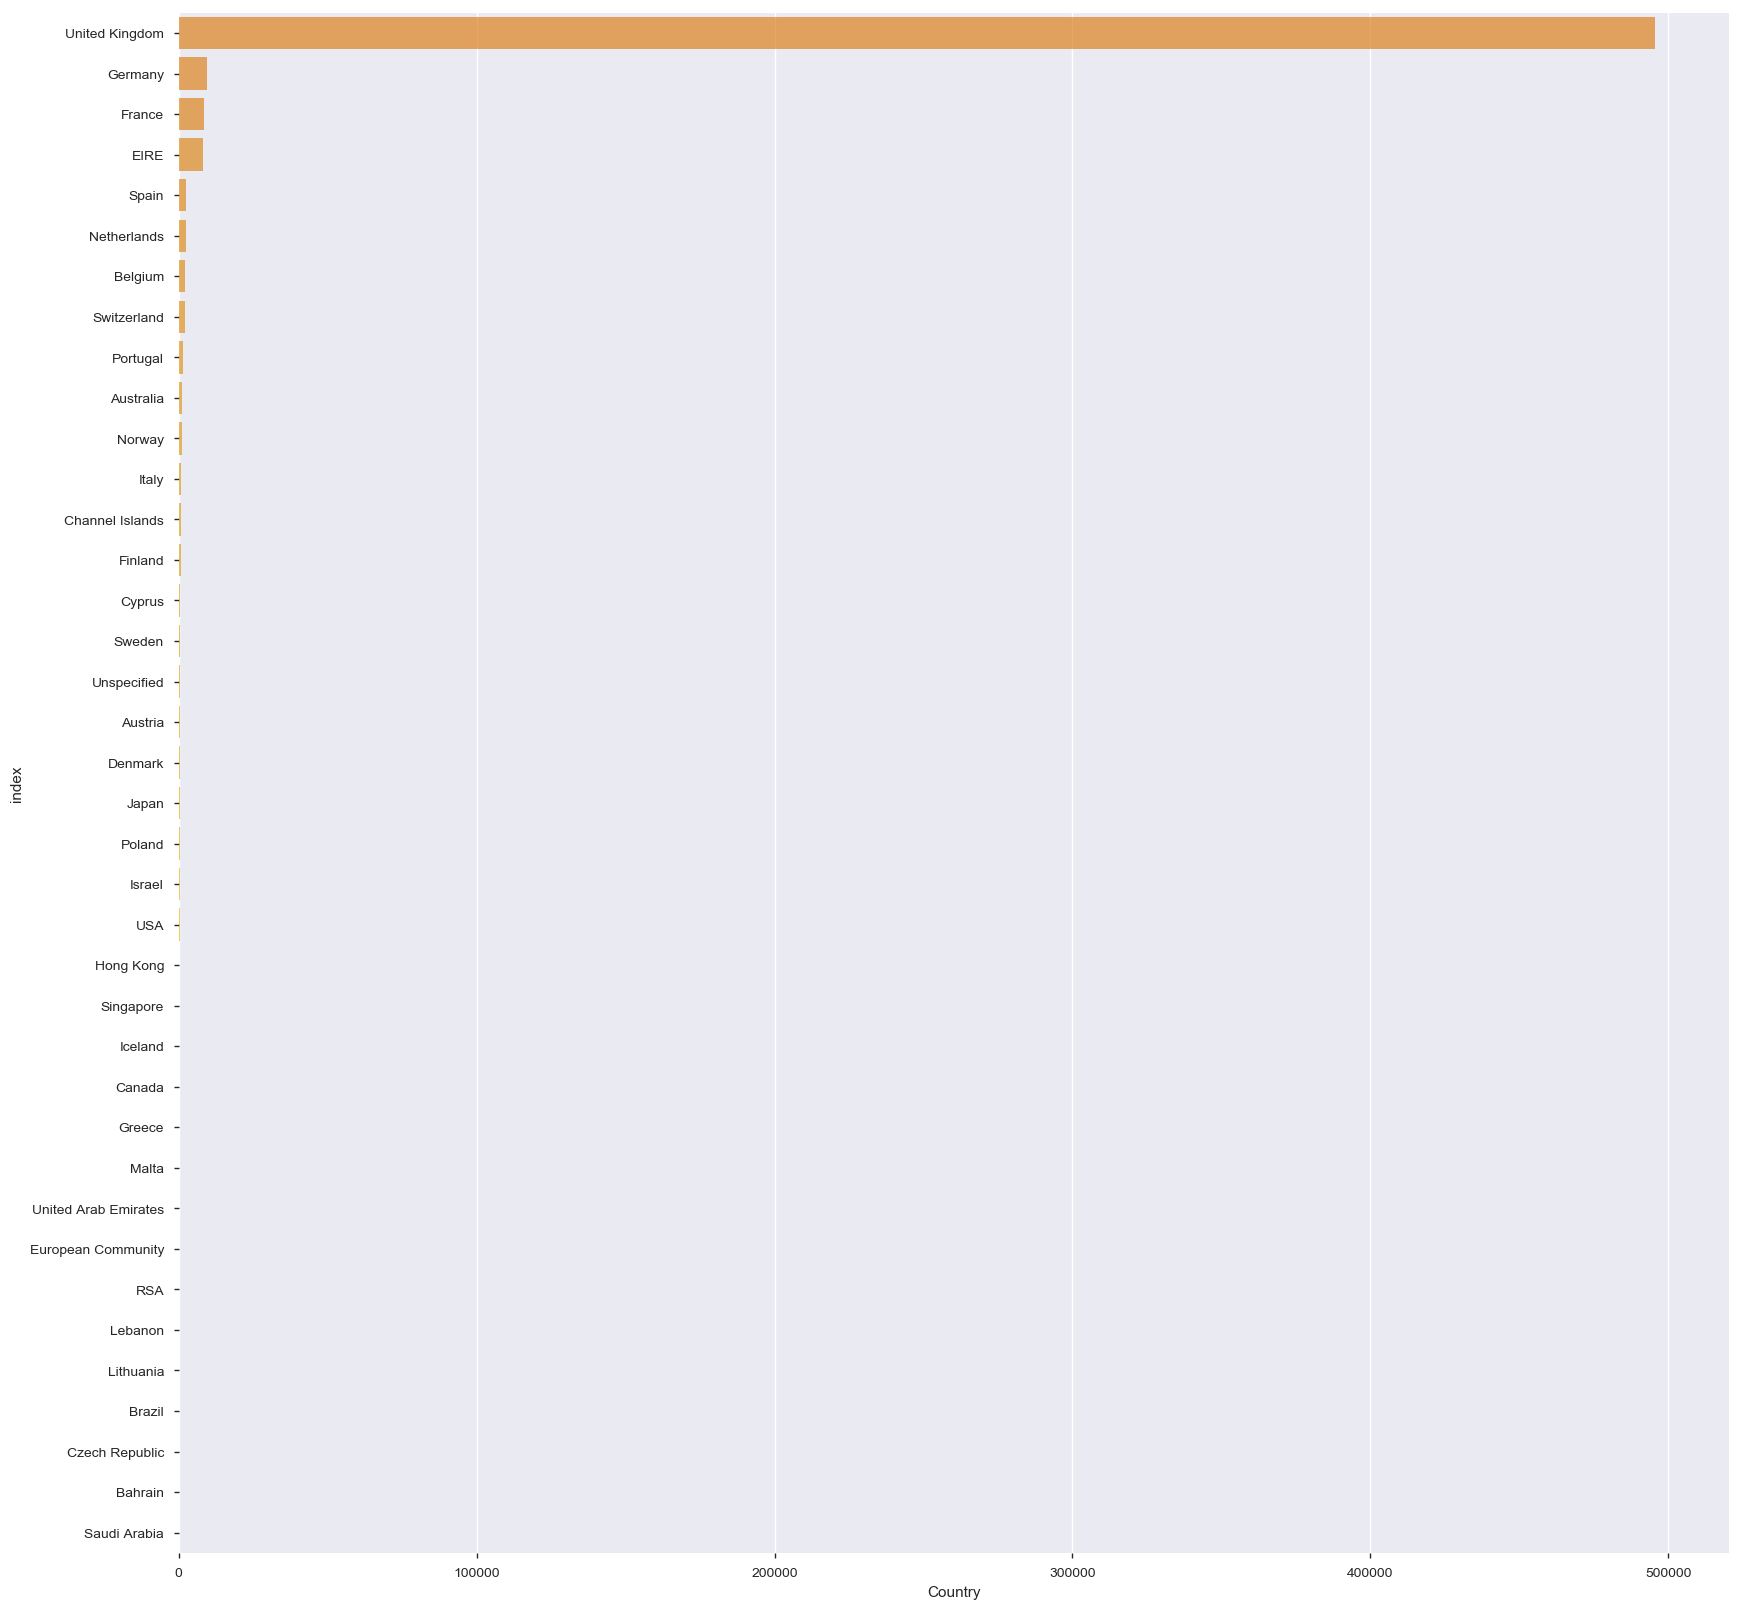

In [8]:
f = plt.subplots(1,figsize=(20,20))
sns.barplot('Country','index', data=df_country,alpha=0.7,palette="Wistia_r")
plt.show()

In [9]:
## Top Customers contributing to 10% of total Sales

In [10]:
df.CustomerID.unique().shape

(4373,)

In [11]:
(df.CustomerID.value_counts()/sum(df.CustomerID.value_counts())*100).head(n=13).cumsum()

17841.0    1.962249
14911.0    3.413228
14096.0    4.673708
12748.0    5.814728
14606.0    6.498553
15311.0    7.110850
14646.0    7.623350
13089.0    8.079807
13263.0    8.492020
14298.0    8.895138
15039.0    9.265809
14156.0    9.614850
18118.0    9.930462
Name: CustomerID, dtype: float64

<img src="Finland.JPG" alt="PH Meter" width="500"/>

## Analysis for Finland

In [12]:
#separate out Italy for further analysis
df_Finland=df[df.Country=='Finland']
df_Finland.shape

(695, 8)

In [13]:
#Reorganize data
bskt_Finland=pd.pivot_table(df_Finland, index='InvoiceNo', columns='Description', values='Quantity', fill_value=0)
bskt_Finland.head(10)

Description,NINE DRAWER OFFICE TIDY,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE WOODLAND,20 DOLLY PEGS RETROSPOT,3 GARDENIA MORRIS BOXED CANDLES,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE WOODLAND,4 ROSE PINK DINNER CANDLES,4 SKY BLUE DINNER CANDLES,6 RIBBONS RUSTIC CHARM,...,WOODLAND STORAGE BOX LARGE,WOODLAND STORAGE BOX SMALL,WRAP ALPHABET DESIGN,WRAP COWBOYS,WRAP DOILEY DESIGN,WRAP DOLLY GIRL,WRAP ENGLISH ROSE,WRAP PINK FAIRY CAKES,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
539318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541756,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
544886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
545226,0,0,0,0,4,0,0,12,12,0,...,0,0,0,0,0,0,0,0,0,0
545227,0,0,0,0,0,16,0,0,0,0,...,0,0,25,25,25,0,25,25,0,0
545336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
547086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
548363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
bskt_Finland.shape

(48, 465)

While analysing the data for Finland country it is found that people are more intrested in 465 categories out of globally available 4224 categories

In [15]:
# Write a function to do 0 or 1 coding for all items
def cod(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

bskt_sets = bskt_Finland.applymap(cod)

In [16]:
# find rules which have at least 5% suport level
frequent_itemsets = apriori(bskt_sets, min_support=0.05, use_colnames=True)
frequent_itemsets.shape
frequent_itemsets.head()

(105, 2)

,support,itemsets
0,0.0625,(60 CAKE CASES DOLLY GIRL DESIGN)
1,0.0625,(60 TEATIME FAIRY CAKE CASES)
2,0.0625,(BAKING SET 9 PIECE RETROSPOT )
3,0.0625,(BLUE DINER WALL CLOCK)
4,0.0625,(BLUE POLKADOT BEAKER )


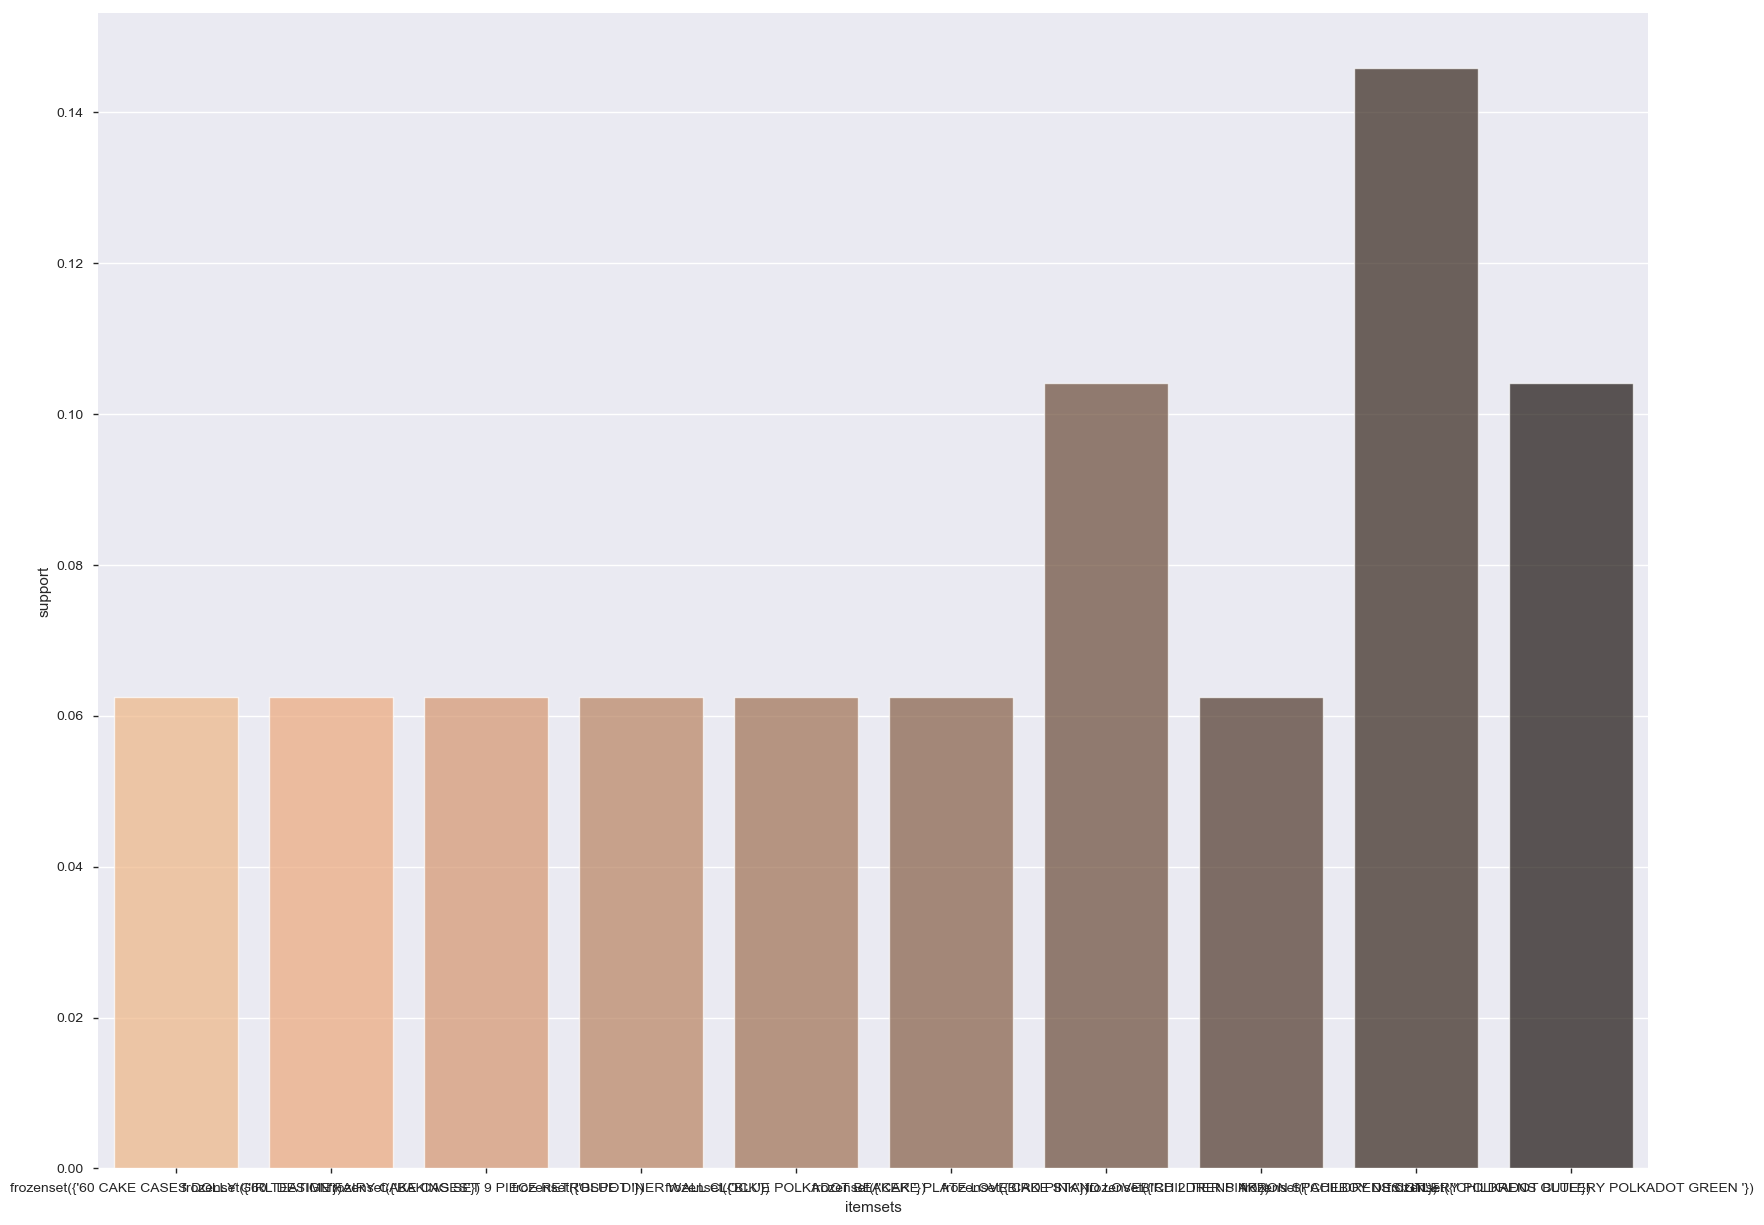

In [17]:
f = plt.subplots(1,figsize=(20,15))
sns.set(style="whitegrid")
sns.barplot('itemsets','support', data=frequent_itemsets.head(10),alpha=0.7,palette="copper_r")
plt.show()

In [18]:
#build rules with minimum lift of 1
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.shape
rules.head()

(210, 9)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(POSTAGE),(60 CAKE CASES DOLLY GIRL DESIGN),0.770833,0.062500,0.0625,0.081081,1.297297,0.014323,1.020221
1,(60 CAKE CASES DOLLY GIRL DESIGN),(POSTAGE),0.062500,0.770833,0.0625,1.000000,1.297297,0.014323,inf
2,(60 TEATIME FAIRY CAKE CASES),(PACK OF 60 PINK PAISLEY CAKE CASES),0.062500,0.062500,0.0625,1.000000,16.000000,0.058594,inf
3,(PACK OF 60 PINK PAISLEY CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.062500,0.062500,0.0625,1.000000,16.000000,0.058594,inf
4,(60 TEATIME FAIRY CAKE CASES),(POSTAGE),0.062500,0.770833,0.0625,1.000000,1.297297,0.014323,inf


<img src="Germany.JPG" alt="PH Meter" width="500"/>

## Analysis for Germany 

In [19]:
#separate out Italy for further analysis
df_Germany=df[df.Country=='Germany']
df_Germany.shape

(9495, 8)

In [20]:
#Reorganize data
bskt_Germany=pd.pivot_table(df_Germany, index='InvoiceNo', columns='Description', values='Quantity', fill_value=0)
bskt_Germany.head(10)

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537212,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
bskt_Germany.shape
bskt_sets1 = bskt_Germany.applymap(cod)

(603, 1703)

While analysing the data for Germany country it is found that people are more intrested in 1703 categories out of globally available 4224 categories

In [22]:
# find rules which have at least 5% suport level
frequent_itemsets1 = apriori(bskt_sets1, min_support=0.05, use_colnames=True)
frequent_itemsets1.shape
frequent_itemsets1.head()

(44, 2)

,support,itemsets
0,0.077944,(6 RIBBONS RUSTIC CHARM)
1,0.053068,(ALARM CLOCK BAKELIKE PINK)
2,0.054726,(GUMBALL COAT RACK)
3,0.069652,(JAM MAKING SET PRINTED)
4,0.059701,(JUMBO BAG RED RETROSPOT)


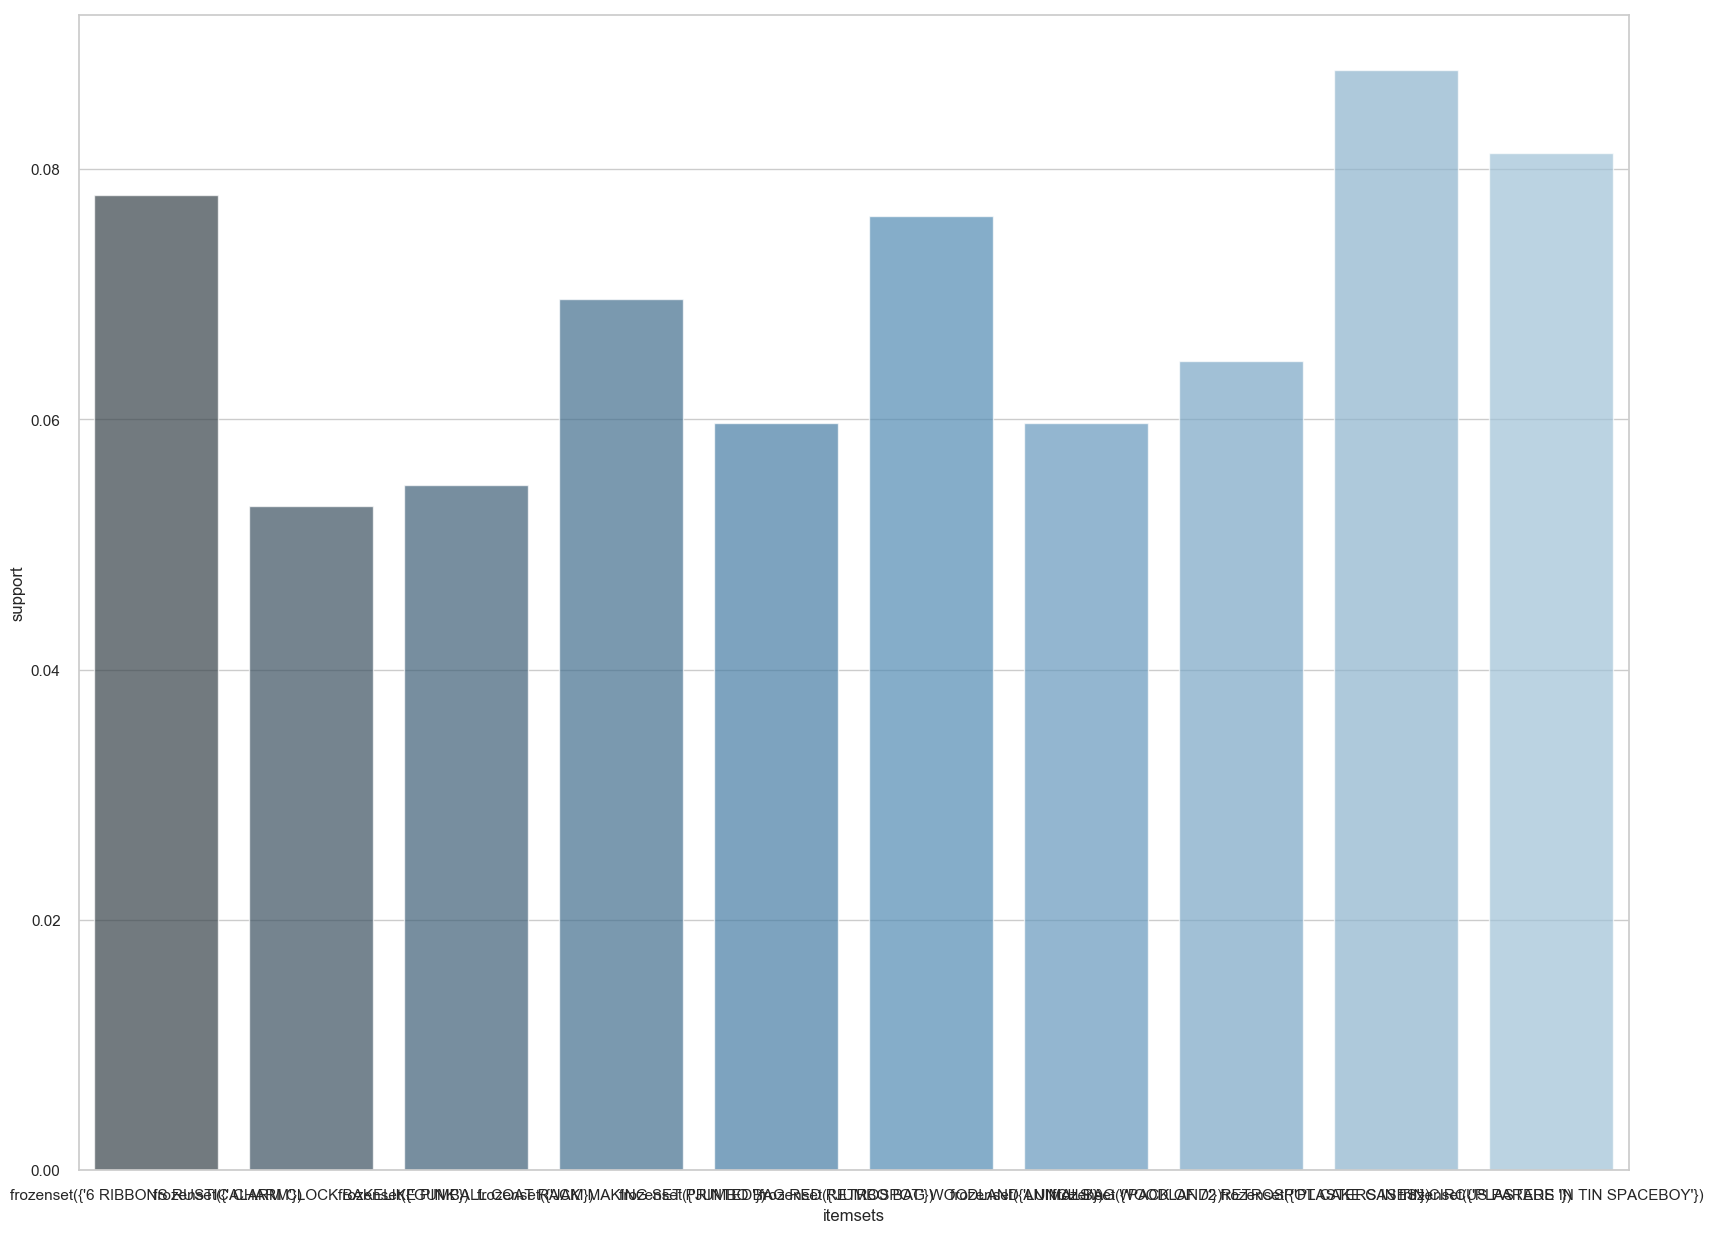

In [23]:
f = plt.subplots(1,figsize=(20,15))
sns.barplot('itemsets','support', data=frequent_itemsets1.head(10),alpha=0.7, palette="Blues_d")
plt.show()

In [24]:
#build rules with minimum lift of 1
rules1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=1)
rules1.shape
rules1.head()

(44, 9)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(6 RIBBONS RUSTIC CHARM),(POSTAGE),0.077944,0.620232,0.069652,0.893617,1.440778,0.021309,3.569818
1,(POSTAGE),(6 RIBBONS RUSTIC CHARM),0.620232,0.077944,0.069652,0.112299,1.440778,0.021309,1.038702
2,(JAM MAKING SET PRINTED),(POSTAGE),0.069652,0.620232,0.056385,0.809524,1.305195,0.013184,1.993781
3,(POSTAGE),(JAM MAKING SET PRINTED),0.620232,0.069652,0.056385,0.090909,1.305195,0.013184,1.023383
4,(JUMBO BAG WOODLAND ANIMALS),(POSTAGE),0.076285,0.620232,0.066335,0.869565,1.402000,0.019020,2.911553


Based on 2 countries analysis of Germany and Finland found that Germany seems to spending more comparing to Finland.
German consumers take a systematic approach to purchasing. They like to know everything about a product order to compare it to similar products and make the most informed and best purchase possible